### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
print(reviews.shape)
print(reviews.columns)

(2000, 11)
Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


In [5]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews.drop(['language','platform'], axis=1, inplace=True)

# View column names.
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration',
                                 'spending_score (1-100)': 'spending_score'})


# View column names.
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('reviews_cleaned.csv', index=False)


In [10]:
# Import new CSV file with Pandas.
reviews_cleaned = pd.read_csv("reviews_cleaned.csv")


# View DataFrame.
reviews_cleaned.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

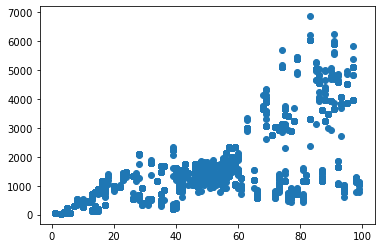

In [11]:
# Independent variable.
x = reviews_cleaned['spending_score']

# Dependent variable.
y = reviews_cleaned['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [12]:
# Add a constant to the independent variable for the intercept term
x = sm.add_constant(x)

# OLS model and summary.
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.92e-263
Time:                        14:46:02   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [13]:
# Extract the estimated parameters.
params = model.params


# Extract the standard errors.
std_err = model.bse


# Extract the predicted values.
predicted = model.predict(x)

In [14]:
# Set the X coefficient and the constant to generate the regression table.
reg_table = pd.DataFrame({'Coefficient': params, 'Std. Error': std_err})

# View the output.
print(reg_table)

                Coefficient  Std. Error
const            -75.052663   45.930554
spending_score    33.061693    0.814419


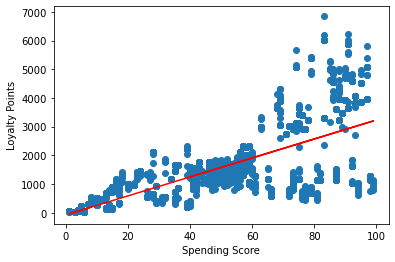

In [15]:
# Plot the graph with a regression line.
plt.scatter(x['spending_score'], y)
plt.plot(x['spending_score'], predicted, color='red')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.show()

- Positive correlation observed for Spending Score vs Loyalty Points

### 5b) remuneration vs loyalty

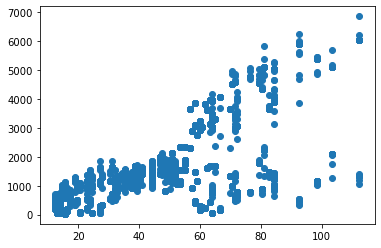

In [16]:
# Independent variable.
x = reviews_cleaned['remuneration']


# Dependent variable.
y = reviews_cleaned['loyalty_points']


# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [17]:
# Add a constant to the independent variable for the intercept term
x = sm.add_constant(x)

# OLS model and summary.
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.43e-209
Time:                        14:46:03   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [18]:
# Extract the estimated parameters.
params = model.params


# Extract the standard errors.
std_err = model.bse


# Extract the predicted values.
predicted = model.predict(x)

In [19]:
# Set the X coefficient and the constant to generate the regression table.
reg_table = pd.DataFrame({'Coefficient': params, 'Std. Error': std_err})

# View the output.
print(reg_table)

              Coefficient  Std. Error
const          -65.686513   52.170717
remuneration    34.187825    0.977925


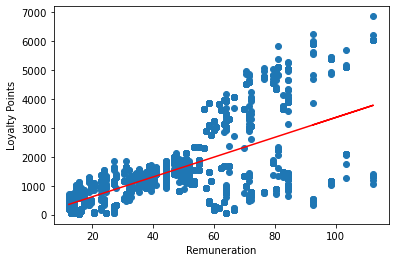

In [20]:
# Plot the graph with a regression line.
plt.scatter(x['remuneration'], y)
plt.plot(x['remuneration'], predicted, color='red')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.show()

- Positive correlation observed for Remuneration vs Loyalty Points

### 5c) age vs loyalty

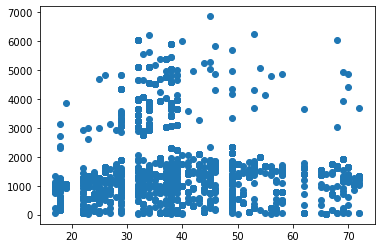

In [21]:
# Independent variable.
x = reviews_cleaned['age']

# Dependent variable.
y = reviews_cleaned['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [22]:
# Add a constant to the independent variable for the intercept term
x = sm.add_constant(x)

# OLS model and summary.
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Apr 2023   Prob (F-statistic):             0.0577
Time:                        14:46:03   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [23]:
# Extract the estimated parameters.
params = model.params


# Extract the standard errors.
std_err = model.bse


# Extract the predicted values.
predicted = model.predict(x)

In [24]:
# Set the X coefficient and the constant to generate the regression table.
reg_table = pd.DataFrame({'Coefficient': params, 'Std. Error': std_err})

# View the output.
print(reg_table)

       Coefficient  Std. Error
const  1736.517739   88.248731
age      -4.012805    2.113177


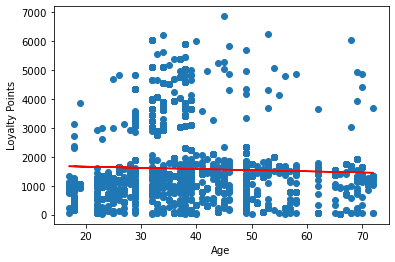

In [25]:
# Plot graph with regression line.
# Plot the graph with a regression line.
plt.scatter(x['age'], y)
plt.plot(x['age'], predicted, color='red')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.show()

- Very weak negative correlation observed for Age vs Loyalty Points

Given that these regression models were isolated from each other in the sense that only one independent variable was considered in each model, it is worth running a multiple regression model to more accurately determine the significance of each independent variable. 

### Multiple Regression Model

In [26]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [27]:
reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [28]:
# Define the dependent variable.
y = reviews_cleaned['loyalty_points'] 

# Define the independent variable.
X = reviews_cleaned[['spending_score', 'remuneration', 'age']] 

In [29]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [30]:
# Call the predictions for X (array).
multi.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [31]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8399114912748796
Intercept:  -2203.0597513079
Coefficients:


[('spending_score', 34.18319657763365),
 ('remuneration', 34.0083854926025),
 ('age', 11.060658711843335)]

In [32]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [33]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:46:03   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.

In [34]:
print(multi.score(x_train, y_train)*100)

84.24398896169723


In [35]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [36]:
# Call the predictions for X in the training set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for training set: {}".format(y_pred_mlr)) 

Prediction for training set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


In [37]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [-4.25709053e+02  2.99343559e+03  2.60003812e+03  1.22401268e+03
  1.53391529e+03  1.79212254e+03  4.18943142e+02  1.38614741e+03
  1.36427501e+03  3.26123743e+03  1.28766114e+03  1.65894130e+03
  1.69575771e+03  2.33734079e+03  1.27743942e+03  1.46204653e+03
  1.69474080e+03  8.09214691e+02 -2.63922829e+01 -9.61682267e+02
  1.55468086e+03  5.11057805e+01  1.64730047e+03  1.29858491e+03
  1.41546811e+03  1.42269406e+03  3.87919648e+03  1.61275266e+03
  1.63341589e+03  1.84791589e+03  8.88818487e+01  6.70246855e+02
  1.00427573e+03  1.71837726e+03  1.66852576e+03  1.28842071e+03
  8.91492831e+02  2.09899697e+03  1.36106930e+03  1.07872564e+03
  1.02910663e+03  1.57353521e+03  1.40597357e+03  4.23039314e+03
  4.27476021e+03 -3.51451403e+02  1.71837726e+03  1.53391529e+03
  1.84020998e+03  1.77547954e+03  1.36186127e+03  8.42143578e+02
  8.92577110e+02 -4.98080057e+02  1.95151882e+03  1.49956756e+03
  3.88942654e+02  4.07828006e+03  1.54909408e+03  3.16017028e+03


In [38]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)  

82.90723396315803


In [39]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(2))

   VIF Factor        features
0       20.73           const
1        1.06  spending_score
2        1.00    remuneration
3        1.06             age


- Low VIF Factor scores for all 3 variables suggest no multicollinearity between the variables.

In [40]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [41]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 39.20687709402326, 'LM Test p-value': 1.569051868116325e-08, 'F-stat': 13.363756098044313, 'F-test p-value': 1.2899128216958638e-08}


- There is evidence of heteroscedasticity in the model - variance of the residuals is not constant across different levels of the independent variables

In [42]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 402.23503056376904
Mean Square Error (Final): 277188.7023322058


## 6. Observations and insights

***Your observations here...***






From the OLS Linear Regression model for each independent variable:
- Spending and Remuneration had similar positive coefficients of 33.0617 and 34.1878 respectively while Age had a negative coefficient of -4.0128
- Spending and Remuneration have relatively low standard errors compared to Age
- Spending and Remuneration have relatively high t-values indicating the variables are statistically significant whereas age has a very small t-value indicating it is not as statistically significant
- Spending and Remuneration have p-values smaller than 0.05 indicating statistical significance whereas Age has a value higher than 0.05 indicating it is not statistically significant
- Spending and Remuneration have R-squared values of 0.452 and 0.38 compared to a very small R-squared value of 0.002 indicating that a very small proportion of the variance in the dependent variable is explained by Age.
- F-statistic for Spending and Remuneration significantly higher then F-statistic for age; this suggests spending and remuneration are important predictors of the dependent variable whereas Age is not as significant 
- Visually, when observing the plots there is a clearer positive correlation for both Spending and Remuneration whereas the correlation is not as obvious for Age.

From the Multiple Linear Regression Model:
- Positive coefficients across all 3 variables with relatively similar values.  
- Similar to the linear regression model, Spending and Remuneration have relatively lower standard errors compared to Age
- Spending and Remuneration have relatively higher t-value than Age by a factor of 6, indicating they are more statistically significant than Age
- All variables have a p-value lower than 0.05
- R-squared value is 0.842 for traing set of data and 0.829 which indicates the data is a good fit for the multiple regression model
- Low VIF Factors across all variables suggesting a very low chance of multicollinearity, signifying the strength of the model
- LM Test p-value, F-stat and F-test p-value suggest there is evidence of heteroscedasticity in the model. This suggests that the variance of the residuals is not constant across different levels of the independent variables, which violates one of the assumptions of linear regression.

Summary:
- As Spending and Remuneration increase, so does the loyalty points of the customers. There is less evidence that suggests that Age is significant enough of a variable that will affect the loyalty points of a customer. According to the model, it is suggested that the most significant variable is the Spending followed by Remuneration by a close margin. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [43]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews_cleaned.csv')

# View DataFrame.
df2

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [45]:
# Drop unnecessary columns.
df2 = df2[['remuneration', 'spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [46]:
# Explore the data.
print(df2.shape)
print(df2.columns)

(2000, 2)
Index(['remuneration', 'spending_score'], dtype='object')


In [47]:
# Descriptive statistics.
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [48]:
# Create a dictionary with the results
results = {
    'Remuneration': [df2['remuneration'].min(), df2['remuneration'].max(), df2['remuneration'].mean(), df2['remuneration'].median()],
    'Spending Score': [df2['spending_score'].min(), df2['spending_score'].max(), df2['spending_score'].mean(), df2['spending_score'].median()]
}

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results, index=['Minimum', 'Maximum', 'Mean', 'Median'])

# Display the DataFrame
print(df_results)

         Remuneration  Spending Score
Minimum      12.30000             1.0
Maximum     112.34000            99.0
Mean         48.07906            50.0
Median       47.15000            50.0


## 2. Plot

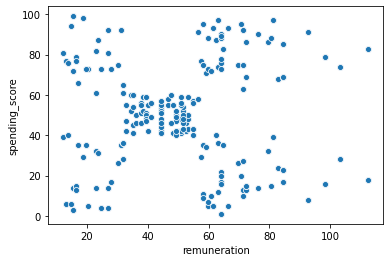

In [49]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', data=df2)

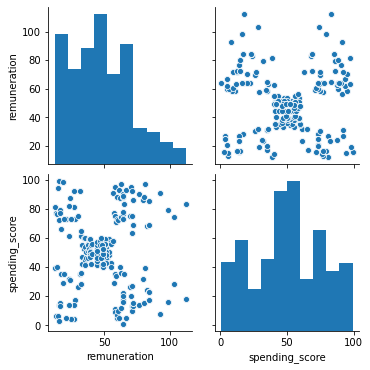

In [50]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]
sns.pairplot(df2, vars=x)

- Visually, 5 distinct clusters can be observed from the scatterplot

## 3. Elbow and silhoutte methods

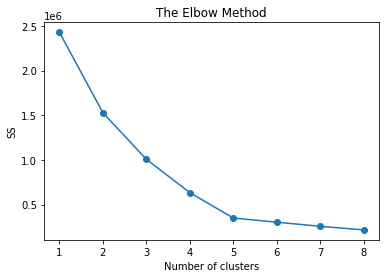

In [51]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 9): 
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 9),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

A range of (1,9) was determined to be optimal as a clear elbow can be observed in the plot. In this case, the plot suggests that the optimal number of clustes is 5 as the elbow is observed to have occurred at that data point. 

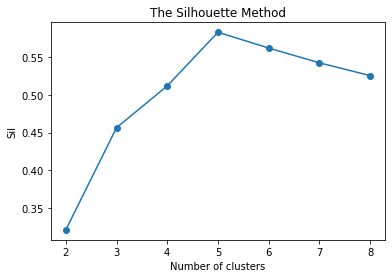

In [52]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 8

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.gca().set_facecolor('white')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

According to the Silhouette plot, the data point of 5 clusters is shown to have the highest Silhouette score suggesting that 5 is the optimal number of clusters. This answer is in agreement with the elbow  method which also suggests 5 is the optimal number and hence, we will be using 5 clusters to for the k-means model.

## 4. Evaluate k-means model at different values of *k*

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

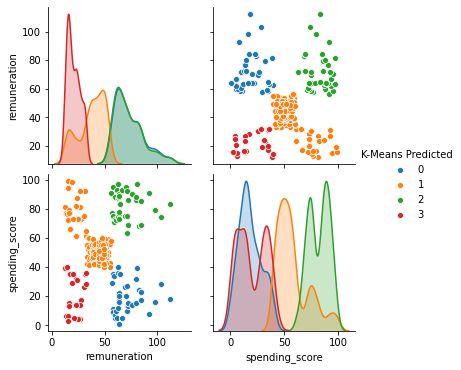

In [53]:
# Using 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64

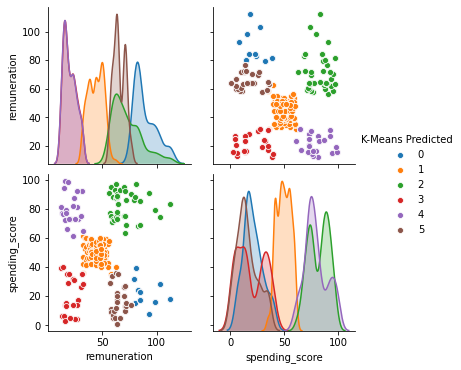

In [54]:
# Using 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

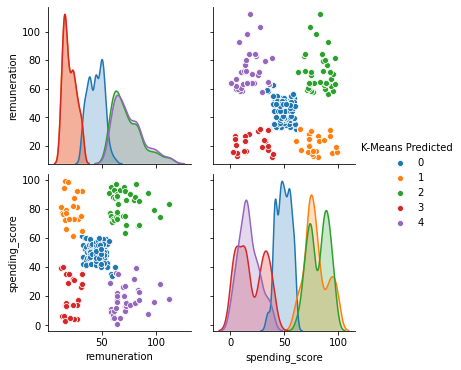

In [55]:
# Using 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 100000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

## 5. Fit final model and justify your choice

In [56]:
# Apply the final model.
# For 5 clusters
print(x)

      remuneration  spending_score  K-Means Predicted
0            12.30              39                  3
1            12.30              81                  1
2            13.12               6                  3
3            13.12              77                  1
4            13.94              40                  3
...            ...             ...                ...
1995         84.46              69                  2
1996         92.66               8                  4
1997         92.66              91                  2
1998         98.40              16                  4
1999         92.66               8                  4

[2000 rows x 3 columns]


- The output shows which cluster each data point belongs to 

## 6. Plot and interpret the clusters

In [57]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# View the DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


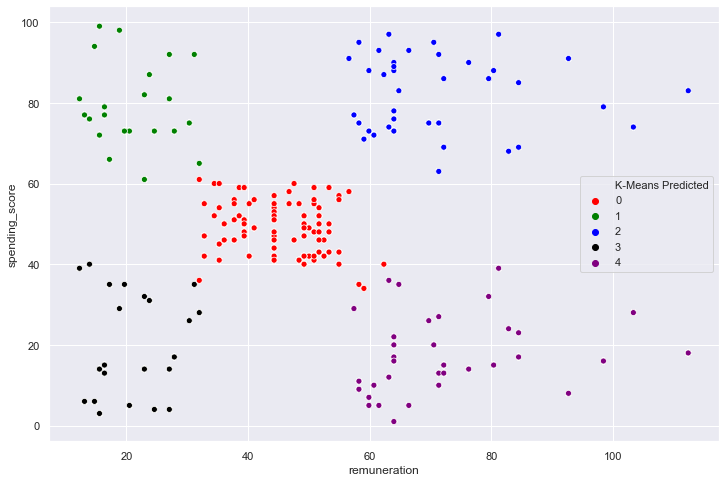

In [58]:
# Visualising the clusters.

sns.scatterplot(x='remuneration',  
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'purple'])

## 7. Discuss: Insights and observations

***Your observations here...***

- The scatterplot for remuneration and spending score is quite scattered but looks to have distinct groups/clusters. It does not seem as if there is an obvious positive or negative correlation between the two variables. As for the pairplot, it appears the data for remuneration is skewed to the left indicating there are more customers with a lower remuneration in the dataset. On the other hand, the histogram for spending_score indicates that the data has a long-tailed distribution or is skewed.  There seem to be peaks at distinct ranges of the data. 
- With the elbow method, it was visually determined that the optimal number of clusters was to be 5 as it where the “elbow” occurs. Different ranges were used for the elbow method to double check that the “elbow” occurred at the same data point as the number of clusters increased. With the Silhouette method, it was also determined that the optimal number of clusters was 5 as the data point has the highest silhouette score, which suggests better-defined clusters.
- The k-means model was evaluated at different values of k, specifically with clusters of 4, 5 and 6. When analysing the number of observation per predicted class for each cluster, it appears that the 5 -cluster model is reasonably balanced, with no cluster being too small or too large compared to the others.
- When the clusters were plotted and visualised, it was shown that there were 5 fairly distinct clusters. 
- Marketing insights and recommendations: The identified clusters can be leveraged by the marketing department to develop tailored marketing strategies or campaigns for each group. For instance, high-income, high-spending customers (Cluster 2) might be targeted with premium products or exclusive offers, whereas low-income, high-spending customers (Cluster 1) could benefit from budget-friendly deals or financing options. By addressing the specific needs and preferences of each cluster, the marketing department can more effectively engage customers, ultimately leading to improved sales performance and a better understanding of customer trends.
- Limitations and further research: The k-means clustering approach has some limitations, such as sensitivity to the initial placement of cluster centroids and the assumption of equal-sized and spherical clusters. These constraints may lead to suboptimal clustering results or difficulty in identifying the true underlying structure in the data. To address these limitations, alternative clustering techniques can be explored, such as hierarchical clustering or DBSCAN (Density-Based Spatial Clustering of Applications with Noise), which can handle varying cluster sizes and shapes more effectively. Additionally, incorporating other customer attributes, such as demographics or purchase history, could help refine the customer segmentation and provide a more comprehensive understanding of the customer base.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [59]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load the data set as df3.
df3 = pd.read_csv('reviews_cleaned.csv')

# View DataFrame.
df3

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [62]:
# Explore data set.
print(df3.shape)
print(df3.columns)

(2000, 9)
Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


In [63]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [64]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [65]:
# Change the text to lower case for each column
df3['review'] = df3['review'].str.lower()
df3['summary'] = df3['summary'].str.lower()

#View the dataframe to check that the text is lowercase
df3

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages (with mom...,the perfect word game for mixed ages (with mom
1996,great game. did not think i would like it whe...,super fun
1997,great game for all.........\nkeeps the mind ni...,great game
1998,fun game!,four stars


In [66]:
# Summary: Change all to lower case and join with a space.
joined_review = ' '.join(df3['review'])
joined_summary = ' '.join(df3['summary'])

In [67]:
print(joined_review)

when it comes to a dm's screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely. an open letter to galeforce9*:

your unpainted miniatures are very not bad. your spell cards are great. your board games are "meh". your dm screens, however, are freaking terrible. i'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. once again, you've created a single use screen that is only useful when running the "storm king's thunder" adventure. even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. i massive swath of the inner panel is wasted on artwork a

In [68]:
print(joined_summary)

the fact that 50% of this space is wasted on art (and not terribly informative or needed art ... another worthless dungeon master's screen from galeforce9 pretty, but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity.  not a value add to the product line. five stars love the map! not a general dm screen very weak game fell completely flat... five stars good book buckley was a card mommer very advanced, but as good as it gets you better know what you're getting into don't bother the worst value i've ever seen not enough product good product but... temporary tattoos were good gift. huge hit gorgeous pictures! five stars wonderful designs. wow, great coloring book!!!!!! nice book great pictures perfect! well done.... my relaxation beautiful coloring book the pictures are great, i've done one and gave it to a ... great buy! can't wait to work on this book stained glass perfection! four stars so beau

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [69]:
# Import the necessary libraries
import re

In [70]:
# Replace all the punctuations in review and summary column.
df3['review'] = df3['review'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
df3['summary'] = df3['summary'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))


# View output.
df3

,review,summary
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...
2,nice art nice printing why two panels are f...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new d...,five stars
4,as my review of gf9 s previous screens these w...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it whe...,super fun
1997,great game for all \nkeeps the mind ni...,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [71]:
# Check the number of duplicate values in the review and summary column.
print(df3.review.duplicated().sum())
print(df3.summary.duplicated().sum())

34
603


In [72]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'], keep='first').reset_index(drop=True)

# View DataFrame.
df3

,review,summary
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...
2,nice art nice printing why two panels are f...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new d...,five stars
4,as my review of gf9 s previous screens these w...,money trap
...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom
1969,great game did not think i would like it whe...,super fun
1970,great game for all \nkeeps the mind ni...,great game
1971,fun game,four stars


## 3. Tokenise and create wordclouds

In [73]:
# Create new DataFrame (copy DataFrame).
dfcopy = df3

# View DataFrame.
dfcopy

,review,summary
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...
2,nice art nice printing why two panels are f...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new d...,five stars
4,as my review of gf9 s previous screens these w...,money trap
...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom
1969,great game did not think i would like it whe...,super fun
1970,great game for all \nkeeps the mind ni...,great game
1971,fun game,four stars


In [74]:
# Apply tokenisation to both columns.
dfcopy['review_tokens'] = dfcopy['review'].apply(word_tokenize)
dfcopy['summary_tokens'] = dfcopy['summary'].apply(word_tokenize)

# View DataFrame.
dfcopy

,review,summary,review_tokens,summary_tokens
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...,"[when, it, comes, to, a, dm, s, screen, the, s...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, master, s, scree..."
2,nice art nice printing why two panels are f...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new d...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9 s previous screens these w...,money trap,"[as, my, review, of, gf9, s, previous, screens...","[money, trap]"
...,...,...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1969,great game did not think i would like it whe...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1970,great game for all \nkeeps the mind ni...,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1971,fun game,four stars,"[fun, game]","[four, stars]"


In [75]:
# Flatten the lists to create a list of words
review_words_list = [word for token_list in dfcopy['review_tokens'] for word in token_list]
summary_words_list = [word for token_list in dfcopy['summary_tokens'] for word in token_list]

In [76]:
# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
review_words = ''
for i in range(dfcopy.shape[0]):
    review_words = review_words + dfcopy['review'][i]

In [77]:
# Create the word cloud.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap = 'plasma',
                stopwords = 'none',
                min_font_size = 10).generate(review_words) 

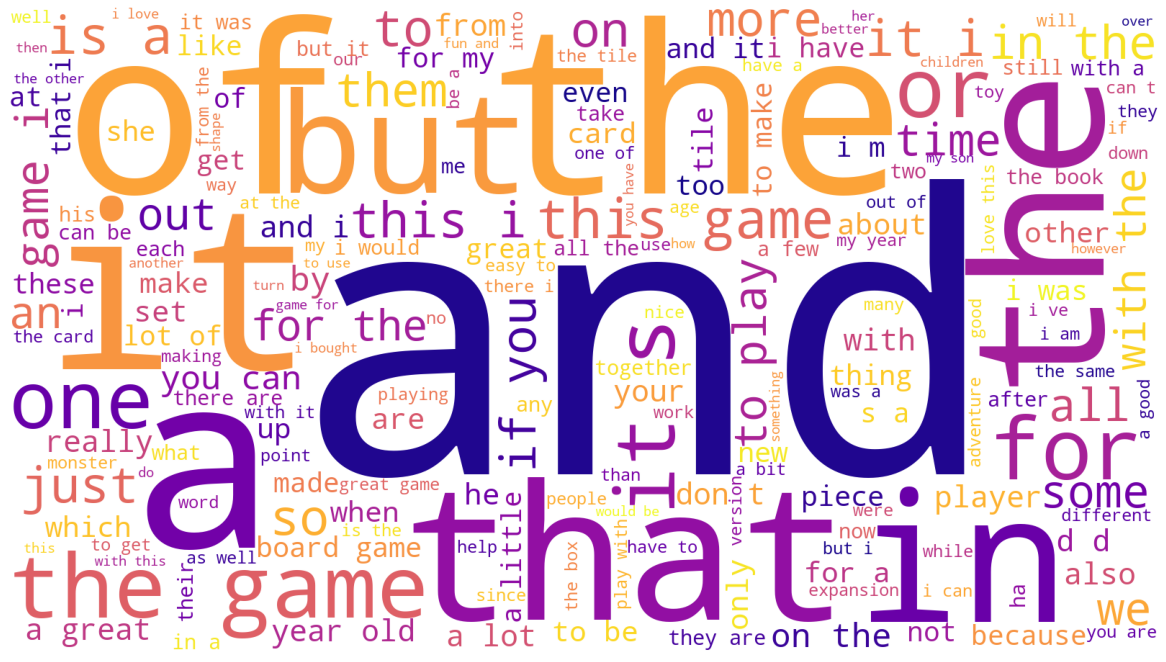

In [78]:
# Review: Plot the WordCloud image.                  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [79]:
# Summary: Create a word cloud.
summary_words = ''
for i in range(dfcopy.shape[0]):
    summary_words = summary_words + dfcopy['summary'][i]

In [80]:
# Create the word cloud.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap = 'plasma',
                stopwords = 'none',
                min_font_size = 10).generate(summary_words) 

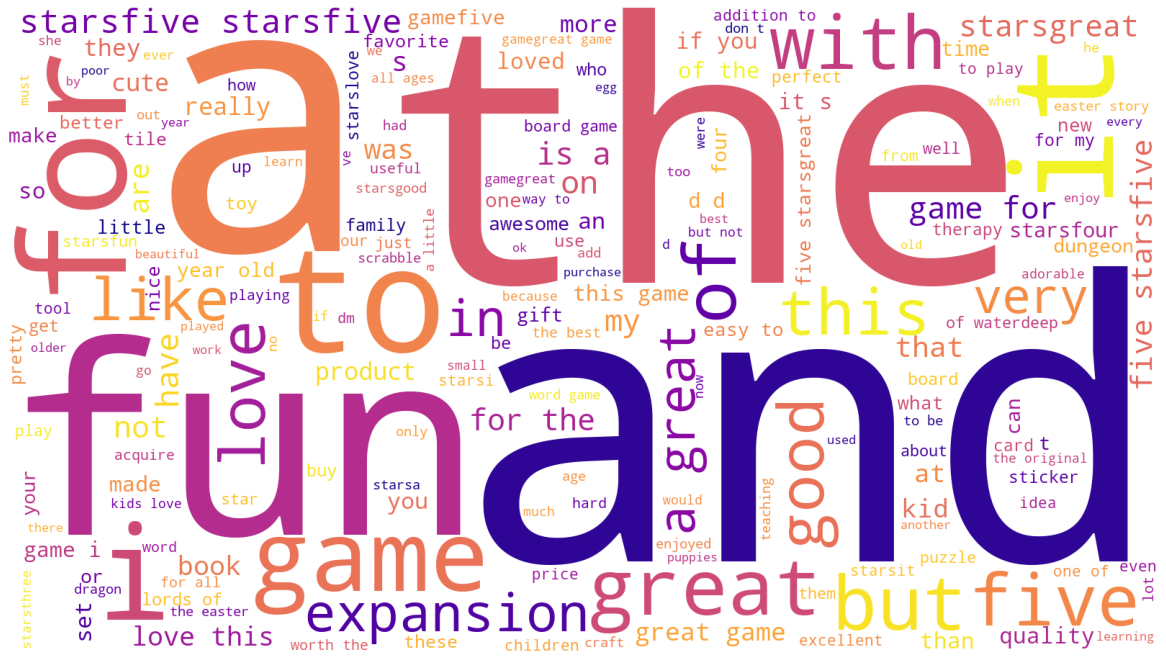

In [81]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

- In both word clouds, a large number of stop words such as "and" and "the" are observed.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [82]:
# Determine the frequency distribution.
# View the frequency distribution.
review_fdist = FreqDist(review_words_list)

# Preview the data.
review_fdist

FreqDist({'the': 5464, 'and': 3252, 'a': 3190, 'to': 3170, 'of': 2499, 'it': 2490, 'i': 2356, 'is': 1783, 'this': 1781, 'game': 1706, ...})

In [83]:
# Determine the frequency distribution.
# View the frequency distribution.
summary_fdist = FreqDist(summary_words_list)

# Preview the data.
summary_fdist

FreqDist({'stars': 439, 'five': 354, 'game': 319, 'great': 296, 'the': 262, 'a': 242, 'for': 232, 'fun': 218, 'to': 193, 'it': 185, ...})

### 4b) Remove alphanumeric characters and stopwords

In [84]:
# Delete all the alpanum and remove all the stopwords
# Function to clean words: remove alphanumeric characters and stopwords
def clean_words(words):
    # Remove alphanumeric characters
    words = [re.sub(r'\W+', '', word) for word in words]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    
    return words

# Clean the words
cleaned_words_list = clean_words(review_words_list)

### 4c) Create wordcloud without stopwords

In [85]:
# Create a wordcloud without stop words.
# Create a single string from the cleaned list of words for the word cloud
cleaned_words = ' '.join(cleaned_words_list)
# Create the word cloud
word_cloud = WordCloud(width=1600, height=900,
                       background_color='white',
                       colormap='plasma',
                       stopwords='none',
                       min_font_size=10).generate(cleaned_words)

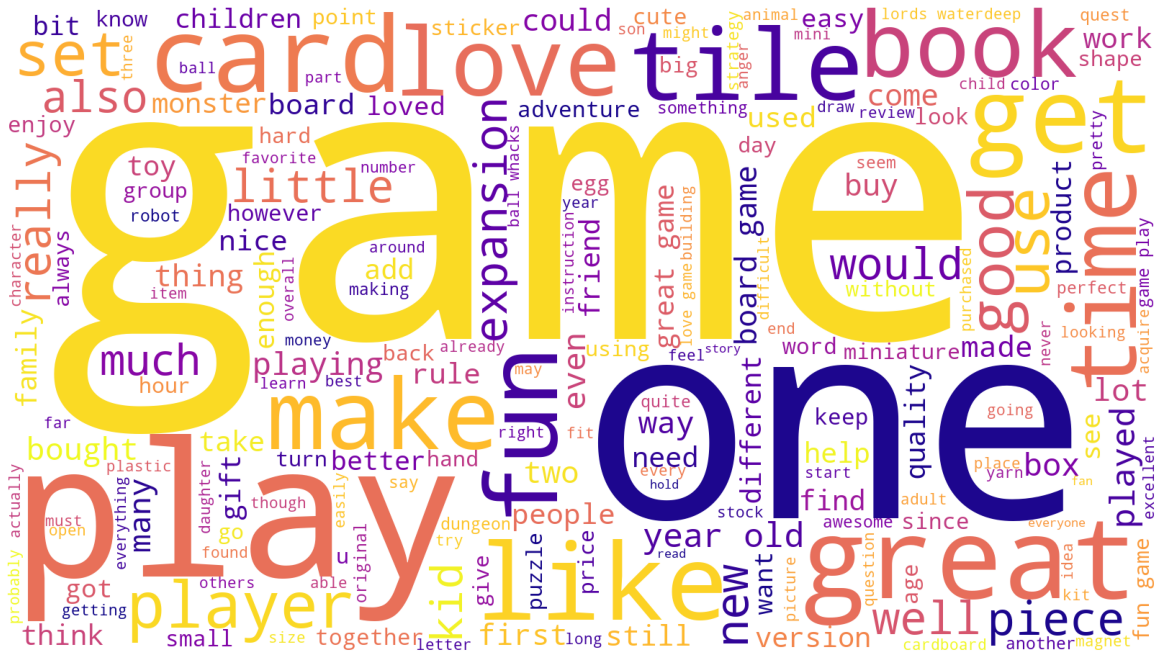

In [86]:
# Plot the wordcloud image.
# Plot the WordCloud image
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [87]:
# Determine the 15 most common words.
cleaned_fdist = FreqDist(cleaned_words_list)

# Get the 15 most common words
most_common_words = cleaned_fdist.most_common(15)

# Print the 15 most common words
print("The 15 most common words are:")
for word, count in most_common_words:
    print(f"{word}: {count}")

The 15 most common words are:
game: 1706
great: 587
fun: 558
one: 540
play: 509
like: 421
love: 325
get: 320
really: 319
cards: 306
tiles: 300
time: 297
good: 292
would: 283
book: 278


The output shown above is in agreement with the wordcloud as these listed words are easily identifiable in the wordcloud. 

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [88]:
# Function to get the polarity of the text
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment.polarity

In [89]:
# Function to get the subjectivity of the text
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment.subjectivity

In [90]:
# Determine polarity of both columns. 
# Apply the custom function to the review and summary columns
dfcopy['review_polarity'] = dfcopy['review'].apply(generate_polarity)
dfcopy['summary_polarity'] = dfcopy['summary'].apply(generate_polarity)
dfcopy['review_subjectivity'] = dfcopy['review'].apply(generate_subjectivity)
dfcopy['summary_subjectivity'] = dfcopy['summary'].apply(generate_subjectivity)
# View output.
dfcopy

,review,summary,review_tokens,summary_tokens,review_polarity,summary_polarity,review_subjectivity,summary_subjectivity
0,when it comes to a dm s screen the space on t...,the fact that 50 of this space is wasted on a...,"[when, it, comes, to, a, dm, s, screen, the, s...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000,0.486111,0.500000
1,an open letter to galeforce9 \n\nyour unpaint...,another worthless dungeon master s screen from...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, master, s, scree...",0.032684,-0.800000,0.440206,0.900000
2,nice art nice printing why two panels are f...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.115410,0.000000,0.427755,0.733333
3,amazing buy bought it as a gift for our new d...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000,0.784848,0.000000
4,as my review of gf9 s previous screens these w...,money trap,"[as, my, review, of, gf9, s, previous, screens...","[money, trap]",-0.316667,0.000000,0.316667,0.000000
...,...,...,...,...,...,...,...,...
1968,the perfect word game for mixed ages with mom...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.168750,0.200000,0.491667,0.550000
1969,great game did not think i would like it whe...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158333,0.316667,0.310043,0.433333
1970,great game for all \nkeeps the mind ni...,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200000,0.200000,0.575000,0.575000
1971,fun game,four stars,"[fun, game]","[four, stars]",-0.050000,0.000000,0.300000,0.000000


Text(0, 0.5, 'Frequency')

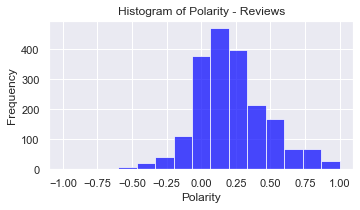

In [91]:
# Review: Create a histogram plot with bins = 15.
plt.figure(figsize=(12, 6))
# Histogram of polarity
plt.subplot(2, 2, 1)
plt.hist(dfcopy['review_polarity'], bins=15, color='blue', alpha=0.7)
plt.title('Histogram of Polarity - Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

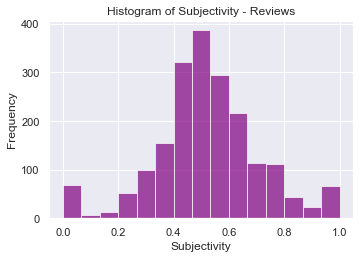

In [92]:
# Histogram of subjectivity score
plt.subplot(2, 2, 3)
plt.hist(dfcopy['review_subjectivity'], bins=15, color='purple', alpha=0.7)
plt.title('Histogram of Subjectivity - Reviews')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

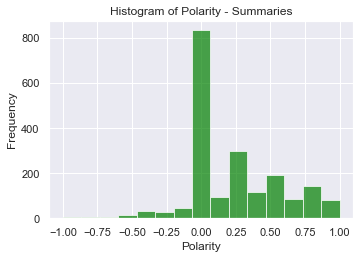

In [93]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.subplot(2, 2, 2)
plt.hist(dfcopy['summary_polarity'], bins=15, color='green', alpha=0.7)
plt.title('Histogram of Polarity - Summaries')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

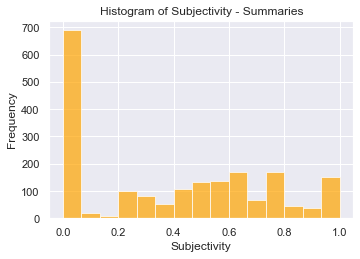

In [94]:
# Histogram of subjectivity score
plt.subplot(2, 2, 4)
plt.hist(dfcopy['summary_subjectivity'], bins=15, color='orange', alpha=0.7)
plt.title('Histogram of Subjectivity - Summaries')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [95]:
# Sort the DataFrame based on the polarity scores
sorted_review = dfcopy.sort_values('review_polarity')
sorted_summary = dfcopy.sort_values('summary_polarity')

In [96]:
# Top 20 negative reviews and polarity scores.
top20_negative_reviews = sorted_review.head(20)

# View output.
print("Top 20 Negative Reviews:")
for index, row in top20_negative_reviews.iterrows():
    review = row['review']
    polarity_score = TextBlob(review).sentiment.polarity
    print(f"{review}\nPolarity score: {polarity_score}\n")

Top 20 Negative Reviews:
booo  unles you are patient know how to measure i didn t have the patience neither did my daughter   boring unless you are a craft person which i am not 
Polarity score: -1.0

incomplete kit   very disappointing 
Polarity score: -0.78

used with anger management group and they like it 
gave them opportunity to share events in their life with
the usage of the cues on the cards 
Polarity score: -0.7

i m sorry  i just find this product to be boring and  to be frank  juvenile 
Polarity score: -0.5833333333333334

one of my staff will be using this game soon  so i don t know how well it works as yet  but after looking at the cards  i believe it will be helpful in getting a conversation started regarding anger and what to do to control it 
Polarity score: -0.55

expensive for what you get 
Polarity score: -0.5

i bought this as a christmas gift for my grandson   its a sticker book  so how can i go wrong with this gift 
Polarity score: -0.5

instructions are complica

- Some of the reviews have been mischaracterised as negative reviews when it is very clearly a positive review. 
- Example: "my son loves playing this game  it was recommended by a counselor at school that works with him" 


In [97]:
# Top 20 negative summaries and polarity scores.
top20_negative_summaries = sorted_summary.head(20)

# View output.
print("Top 20 Negative Summaries:")
for index, row in top20_negative_summaries.iterrows():
    summary = row['summary']
    polarity_score = TextBlob(summary).sentiment.polarity
    print(f"{summary}\nPolarity score: {polarity_score}\n")

Top 20 Negative Summaries:
boring
Polarity score: -1.0

boring unless you are a craft person which i am    
Polarity score: -1.0

the worst value i ve ever seen
Polarity score: -1.0

before this i hated running any rpg campaign dealing with towns because it    
Polarity score: -0.9

another worthless dungeon master s screen from galeforce9
Polarity score: -0.8

disappointed
Polarity score: -0.75

disappointed
Polarity score: -0.75

disappointed
Polarity score: -0.75

disappointed 
Polarity score: -0.75

promotes anger instead of teaching calming methods
Polarity score: -0.7

too bad  this is not what i was expecting 
Polarity score: -0.6999999999999998

bad quality all made of paper
Polarity score: -0.6999999999999998

at age 31 i found these very difficult to make    
Polarity score: -0.65

mad dragon
Polarity score: -0.625

small and boring
Polarity score: -0.625

disappointing
Polarity score: -0.6

disappointing 
Polarity score: -0.6

disappointing
Polarity score: -0.6

disappointin

In [98]:
# Top 20 positive reviews and polarity scores.
top20_positive_reviews = sorted_review.tail(20)

# View output.
print("Top 20 Positive Reviews:")
for index, row in top20_positive_reviews.iterrows():
    review = row['review']
    polarity_score = TextBlob(review).sentiment.polarity
    print(f"{review}\nPolarity score: {polarity_score}\n")

Top 20 Positive Reviews:
delightful product 
Polarity score: 1.0

perfect  just what i ordered  
Polarity score: 1.0

excellent activity for teaching self management skills 
Polarity score: 1.0

wonderful product
Polarity score: 1.0

excellent toy to simulate thought 
Polarity score: 1.0

awesome book
Polarity score: 1.0

awesome set 
Polarity score: 1.0

it s awesome
Polarity score: 1.0

awesome addition to my rpg gm system 
Polarity score: 1.0

it is the best thing to play with and also mind  blowing in some ways
Polarity score: 1.0

one of the best board games i played in along time 
Polarity score: 1.0

wonderful for my grandson to learn the resurrection story 
Polarity score: 1.0

awesome gift
Polarity score: 1.0

perfect for tutoring my grandson in spelling 
Polarity score: 1.0

came in perfect condition 
Polarity score: 1.0

awesome toy 
Polarity score: 1.0

best set  buy 2 if you have the means 
Polarity score: 1.0

perfect 
Polarity score: 1.0

this was perfect to go with the 

In [99]:
# Top 20 positive summaries and polarity scores.
top20_positive_summaries = sorted_summary.tail(20)

# View output.
print("Top 20 Positive Summaries:")
for index, row in top20_positive_summaries.iterrows():
    summary = row['summary']
    polarity_score = TextBlob(summary).sentiment.polarity
    print(f"{summary}\nPolarity score: {polarity_score}\n")

Top 20 Positive Summaries:
excellent tile set
Polarity score: 1.0

best orcs from wotc
Polarity score: 1.0

not the best quality 
Polarity score: 1.0

excellent
Polarity score: 1.0

wonderful 
Polarity score: 1.0

awesome puzzle 
Polarity score: 1.0

awesome book   
Polarity score: 1.0

awesome
Polarity score: 1.0

excellent puzzle
Polarity score: 1.0

excellent 
Polarity score: 1.0

best one in the series
Polarity score: 1.0

they re the perfect size to keep in the car or a diaper    
Polarity score: 1.0

awesome seller  thank you
Polarity score: 1.0

awesome addition to our d d antics
Polarity score: 1.0

awesome expansion 
Polarity score: 1.0

best  boardgame  ever 
Polarity score: 1.0

    loves stickers and she loves peppa so this was perfect  
Polarity score: 1.0

best easter teaching tool 
Polarity score: 1.0

perfect parfait
Polarity score: 1.0

one of the best games
Polarity score: 1.0



## 7. Discuss: Insights and observations

***Your observations here...***

- Once alphanumeric characters and stop words such as “and”, “that”, “it” were removed, it was observed from the Wordcloud image that the most frequently occurring words were ones such as game, play, great and love.  Using the most_common command, the top 15 words were: game, great, fun, one, play, like, love, get, really, cards, tiles, time, good, would, book. From initial impressions, it seems as it the overall sentiment of the reviews and summaries are quite positive. 

- Polarity scores and subjectivity scores were given for each summary and review. Polarity is a score that ranges from +1 to -1 with negative values indicating negative sentiment, positive values indicating positive sentiment, and zero indicating neutral sentiment. Subjectivity is a score that reflects the degree of personal opinion or bias expressed in a text and ranges from 0 to 1, with values closer to 1 indicating a higher degree of subjectivity or personal opinion, and values closer to 0 indicating a lower degree of subjectivity or more objective content.

- These scores were plotted on a histogram. The histogram of polarity for reviews shows a fairly even distribution with a slightly heavier tail to the right, indicating the data is skewed to the right suggesting that there are overall more positive reviews than negative ones. The histogram of subjectivity shows a more even distribution but with higher frequencies at both extreme ends. The histogram suggests that overall, the reviews are more subjective than they are objective. This histogram of polarity for summaries has a heavy tail to the right, indicating the data is very skewed towards the positive side and suggests an overwhelmingly positive sentiment. The histogram of subjectivity for summaries has a peak at the extreme left, indicating that a large number of summaries are very objective.

- Insights and recommendations: If a common word in negative reviews is related to a specific product feature, the marketing team could address the issue by refining that feature or highlighting alternatives in their campaigns. Similarly, if a common word in positive reviews is associated with a desirable aspect of the product, the marketing team could emphasize this aspect in their promotional materials. The marketing department can leverage the sentiment and subjectivity information to create targeted campaigns that resonate with customers and address their concerns, ultimately leading to better sales performance and customer satisfaction.

- The limitations of the NLP approach : potential misinterpretation due to context, sarcasm, or the need for additional text preprocessing (e.g., stemming, lemmatization) to improve the analysis. The limitations of using simple sentiment polarity and subjectivity scores are that they do not always accurately capture the complexity and nuances of human language.
